#January 2019 Model

## Mount drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

base_path = '/content/drive/My\ Drive/tma_project'
base_path_python = '/content/drive/My Drive/tma_project'

Mounted at /content/drive/


## Parameters

In [ ]:
intervals = [5, 10, 25] # Mida del interval (s).
windows = [2, 5, 10] # Mida de la finestra (time steps que utilitzem per predir el next step).

## Charge and process datasets to adapt them to the model

### **DO NOT EXECUTE THIS SECTION IF 2019 FOLDER DOWNLOADED**

Here we can try to aggregate the dataset by different window_seconds. For example if window_seconds = 10 then:

**Original dataset**

|time (s)|bytes|
|---|---|
|0|5|
|6|8|
|12|10|
|18|6|

After applying the aggregation:

|time (s)|bytes|
|---|---|
|0-10|13| 
|10-20|16|

In [ ]:
from datetime import datetime, timedelta

# Create aggregated dataset by window seconds.
def dataset_windows(df, window_seconds = 10):
  time_epoch_start_date = df.iloc[0]['frame.time_epoch']

  # Start date window.
  start_date_window = datetime.fromtimestamp(time_epoch_start_date)
  start_date_window = start_date_window - timedelta(minutes=start_date_window.minute, seconds=start_date_window.second, microseconds=start_date_window.microsecond)
  # End date window.
  end_date_window = start_date_window + timedelta(seconds=window_seconds)
  
  print("Start date: {}".format(start_date_window))

  window_bytes = []
  timestamps = []
  total_bytes = 0
  for index, row in df.iterrows():
    time_epoch = row['frame.time_epoch']
    date = datetime.fromtimestamp(time_epoch)
    byte = row['frame.len']
    if date < end_date_window:
      total_bytes += byte
    else:
      window_bytes.append(total_bytes)
      total_bytes = byte
      timestamps.append(start_date_window)
      start_date_window = start_date_window + timedelta(seconds=window_seconds)
      end_date_window = end_date_window + timedelta(seconds=window_seconds)
  
  df_aggregated = pd.DataFrame({'timestamp': timestamps, 'bytes': window_bytes})

  return df_aggregated

In [ ]:
import pandas as pd
import os.path
#
# Lectura de los datos
#

for i in intervals:

  print("Generating and saving for interval: {}".format(i))

  # Training set.
  df_1 = pd.read_csv('{}/2019/1/201901071400.pcap.sampled.pcap.csv'.format(base_path_python), skiprows=[0])
  df_1 = dataset_windows(df_1, i)

  df_2 = pd.read_csv('{}/2019/1/201901141400.pcap.sampled.pcap.csv'.format(base_path_python), skiprows=[0])
  df_2 = dataset_windows(df_2, i)

  df_3 = pd.read_csv('{}/2019/1/201901211400.pcap.sampled.pcap.csv'.format(base_path_python), skiprows=[0])
  df_3 = dataset_windows(df_3, i)

  # Test set.
  df_4 = pd.read_csv('{}/2019/1/201901281400.pcap.sampled.pcap.csv'.format(base_path_python), skiprows=[0])
  df_4 = dataset_windows(df_4, i)

  # Save the processed datasets.
  if not os.path.exists('{}/2019/1/201901071400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i)):
    df_1.to_csv('{}/2019/1/201901071400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i), sep='\t', encoding='utf-8', index=False)
  if not os.path.exists('{}/2019/1/201901141400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i)):
    df_2.to_csv('{}/2019/1/201901141400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i), sep='\t', encoding='utf-8', index=False)
  if not os.path.exists('{}/2019/1/201901211400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i)):
    df_3.to_csv('{}/2019/1/201901211400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i), sep='\t', encoding='utf-8', index=False)
  if not os.path.exists('{}/2019/1/201901281400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i)):
    df_4.to_csv('{}/2019/1/201901281400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, i), sep='\t', encoding='utf-8', index=False)

Generating and saving for interval: 5
Start date: 2019-01-07 05:00:00
Start date: 2019-01-14 05:00:00
Start date: 2019-01-21 05:00:00
Start date: 2019-01-28 05:00:00
Generating and saving for interval: 10
Start date: 2019-01-07 05:00:00
Start date: 2019-01-14 05:00:00
Start date: 2019-01-21 05:00:00
Start date: 2019-01-28 05:00:00
Generating and saving for interval: 25
Start date: 2019-01-07 05:00:00
Start date: 2019-01-14 05:00:00
Start date: 2019-01-21 05:00:00
Start date: 2019-01-28 05:00:00


## Upload processed datasets

In [ ]:
interval = intervals[1]
window = windows[0]
# The LSTM network will have as input "time_step" consecutive data, and as output 1 data (the prediction calculated
# using the "time_step" data).
time_step = window

print("Interval: {}\nWindow: {}".format(interval, window, time_step))

Interval: 10
Window: 2


In [ ]:
import pandas as pd

df_1 = pd.read_csv('{}/2019/1/201901071400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, interval), sep='\t', parse_dates=['timestamp'])
df_2 = pd.read_csv('{}/2019/1/201901141400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, interval), sep='\t', parse_dates=['timestamp'])
df_3 = pd.read_csv('{}/2019/1/201901211400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, interval), sep='\t', parse_dates=['timestamp'])
df_4 = pd.read_csv('{}/2019/1/201901281400.pcap.sampled.pcap.window{}sec.csv'.format(base_path_python, interval), sep='\t', parse_dates=['timestamp'])

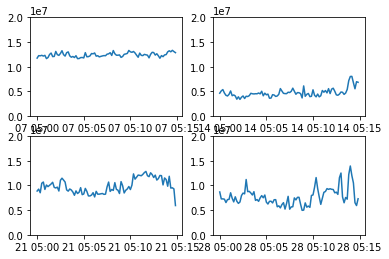

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(df_1['timestamp'], df_1['bytes'])
axs[0, 1].plot(df_2['timestamp'], df_2['bytes'])
axs[1, 0].plot(df_3['timestamp'], df_3['bytes'])
axs[1, 1].plot(df_4['timestamp'], df_4['bytes'])

for ax in axs.flat:
  ax.set_ylim(0, 20000000)

plt.show()

We can observe in the previous plot that the despite the fact that there are days with more GBytes/second, it seems that there is a trend on the traffic.

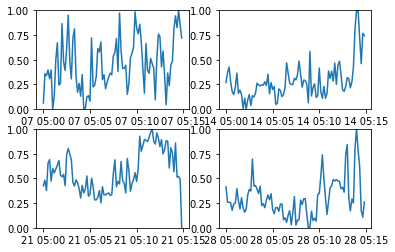

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(df_1['timestamp'], (df_1['bytes'] - min(df_1['bytes']))/( max(df_1['bytes']) - min(df_1['bytes'])))
axs[0, 1].plot(df_2['timestamp'], (df_2['bytes'] - min(df_2['bytes']))/(max(df_2['bytes']) - min(df_2['bytes'])) )
axs[1, 0].plot(df_3['timestamp'], (df_3['bytes'] - min(df_3['bytes']))/(max(df_3['bytes']) - min(df_3['bytes'])) )
axs[1, 1].plot(df_4['timestamp'], (df_4['bytes'] - min(df_4['bytes']))/(max(df_4['bytes']) - min(df_4['bytes'])) )

for ax in axs.flat:
  ax.set_ylim(0, 1)

plt.show()

## Creating and training the model

Training examples: 264
(2, 1)
Epoch 1/20
9/9 [==============================] - 2s 53ms/step - loss: 0.2143
Epoch 2/20
9/9 [==============================] - 0s 47ms/step - loss: 0.1615
Epoch 3/20
9/9 [==============================] - 0s 50ms/step - loss: 0.1251
Epoch 4/20
9/9 [==============================] - 0s 49ms/step - loss: 0.0960
Epoch 5/20
9/9 [==============================] - 0s 49ms/step - loss: 0.0714
Epoch 6/20
9/9 [==============================] - 0s 49ms/step - loss: 0.0550
Epoch 7/20
9/9 [==============================] - 0s 48ms/step - loss: 0.0445
Epoch 8/20
9/9 [==============================] - 0s 50ms/step - loss: 0.0392
Epoch 9/20
9/9 [==============================] - 0s 47ms/step - loss: 0.0373
Epoch 10/20
9/9 [==============================] - 0s 49ms/step - loss: 0.0373
Epoch 11/20
9/9 [==============================] - 0s 49ms/step - loss: 0.0370
Epoch 12/20
9/9 [==============================] - 0s 50ms/step - loss: 0.0371
Epoch 13/20
9/9 [==============

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3/3 [==============================] - 0s 10ms/step
88


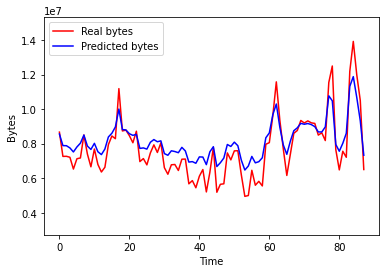

In [ ]:
import numpy as np
np.random.seed(4)

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import RMSprop

training_sets = [df_1.iloc[:,1:2], df_2.iloc[:,1:2], df_3.iloc[:,1:2]]
validation_set = df_4.iloc[:,1:2]
sc = MinMaxScaler(feature_range=(0,1))
scaled_training_sets = []
for se in training_sets:
  scaled_training_sets.append(sc.fit_transform(se))

X_train = []
Y_train = []
for see in scaled_training_sets:
  m = len(see)

  for i in range(time_step,m):
      # X: blocks of "time_step" data: 0-time_step, 1-time_step+1, 2-time_step+2...
      X_train.append(see[i-time_step:i,0])

      # Y: next data
      Y_train.append(see[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

print("Training examples:", len(X_train)) # 85 in each df then: 85 * 3 = 255 examples.

#
# LSTM Network
#
dim_in = (X_train.shape[1],1)
print(dim_in)

dim_out = 1
na = 1000

model = Sequential()
model.add(LSTM(units=na, input_shape=dim_in)) # (batch_size, examples, features_of_each_example)
model.add(Dense(units=dim_out))

opt = RMSprop(learning_rate=0.0001)
model.compile(optimizer=opt, loss='mse')
model.fit(X_train,Y_train,epochs=20,batch_size=32)

#
# Validation
#
x_test = validation_set.values
x_test = sc.transform(x_test)

X_test = []
for i in range(time_step,len(x_test)):
    X_test.append(x_test[i-time_step:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

prediction = model.predict(X_test)
prediction = sc.inverse_transform(prediction)


print(len(prediction))

def graph_predictions(real, prediction):
    plt.plot(real,color='red', label='Real bytes')
    plt.plot(prediction, color='blue', label='Predicted bytes')
    plt.ylim(1.1 * np.min(real)/2, 1.1 * np.max(real))
    plt.xlabel('Time')
    plt.ylabel('Bytes')
    plt.legend()
    plt.show()

# print(print(validation_set.values)    
# print(len(prediction))

graph_predictions(validation_set[0:len(prediction)].values,prediction)

In [ ]:
print("LSTM total error: {}".format(np.sum(np.abs(prediction - validation_set.values[time_step::]))))

LSTM total error: 107762534.0


In [ ]:
# Source for calculating moving averages: https://www.educba.com/moving-average-formula/
w_2_steps = [50, 100]
w_5_steps = [10, 20, 30, 60, 80]

# Computing WMA.
weights = np.array(w_2_steps) # We can define the weights here.
sum_weights = np.sum(weights)


df_4['wma_bytes'] = (df_4['bytes']
    .rolling(window=time_step, center=False)
    .apply(lambda x: np.sum((weights/ np.sum(weights)) * x), raw=False)
)


prediction_wma = np.array(df_4['wma_bytes'].iloc[(time_step)::])

plt.plot(validation_set.values[time_step::],color='red', label='Real bytes')
plt.plot(prediction_wma, color='blue', label='WMA')
plt.ylim(1.1 * np.min(validation_set.values)/2, 1.1 * np.max(validation_set.values))
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.show()

NameError: ignored

In [ ]:
# Errors and difference.

lstm_error = np.sum(np.abs(prediction - validation_set.values[time_step::]))
print("LSTM total error: {}".format(np.sum(np.abs(prediction - validation_set.values[time_step::]))))

wma_error = np.sum(np.abs(prediction_wma - validation_set.values[time_step::]))
print("WMA total error: {}".format(np.sum(np.abs(prediction_wma - validation_set.values[time_step::]))))

print("WMA total error - LSTM total error =", wma_error - lstm_error)

LSTM total error: 107762534.0
WMA total error: 14145154119.999998
WMA total error - LSTM total error = 14037391585.999998


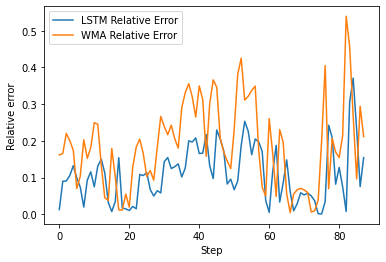

In [ ]:
#Relative error = |real_value - predicted value|/real_value = absolute_error/real_value

lstm_error = np.abs(prediction - validation_set.values[0:len(prediction_wma)][0])/validation_set.values[0:len(prediction)][0]
wma_error = abs(prediction_wma - validation_set.values[0:len(prediction_wma)][0])/validation_set.values[0:len(prediction)][0]
plt.plot(lstm_error, label='LSTM Relative Error')
plt.plot(wma_error, label='WMA Relative Error')
plt.xlabel('Step')
plt.ylabel('Relative error')
plt.legend()
plt.show()

In [ ]:
steps = 1
base_index = 0

first = 0
next = 0

predicted_anomalies = []

for j in range(len(prediction) // steps - 1):
  for i in range(steps):
    first += prediction[i + base_index]
    next += prediction[i + base_index + steps]
    if j==17:
      print(i,base_index,steps,time_step)
    if first/next > 1.1:
      predicted_anomalies.append(i + base_index)

  first = 0
  next = 0
  base_index += steps

print("Anomalies predicted by LSTM:", len(predicted_anomalies))
print(predicted_anomalies)

0 17 1 2
Anomalies predicted by LSTM: 10
[17, 22, 44, 51, 62, 63, 78, 84, 85, 86]


# Label the anomalies

In [ ]:
steps = 1
base_index = 0
first = 0
next = 0
max_error = 5

df_4['anomaly'] = None

anomaly_ranges = []

for j in range(len(df_4) // steps - 1):
  for i in range(steps):
    first += df_4.iloc[i + base_index]['bytes']
    next += df_4.iloc[i + base_index + steps]['bytes']

  for i in range(steps):
    if next/first > 1.3:
      df_4.loc[i + base_index + steps, ['anomaly']] = True
      anomaly_ranges.append([(i + base_index + steps - max_error), (i + base_index + steps + max_error)])

      for error in range(1, max_error):
        df_4.loc[i + base_index + steps + error, ['anomaly']] = True
        df_4.loc[i + base_index + steps - error, ['anomaly']] = True
  
  first = 0
  next = 0
  base_index += steps

print("Anomalies labeled: ", len(df_4[df_4['anomaly'] == True]))
print("Anomalies index:", list(df_4[df_4['anomaly'] == True].index))

print("Anomalies ranges: ", anomaly_ranges)
print("Pred an", predicted_anomalies)

true_positives = 0
false_positive = 0
false_negative = 0
for s,e in anomaly_ranges:
  anomaly_predicted = False
  for pa in predicted_anomalies:
    if pa > s and pa < e:
      true_positives += 1
      anomaly_predicted = True
  if not(anomaly_predicted):
    false_negative += 1

for pa in predicted_anomalies:
  is_anomaly = False
  for s,e in anomaly_ranges:
    if pa > s and pa < e:
      is_anomaly = True
  if not(is_anomaly):
    false_positive += 1

print(true_positives, false_positive, false_negative)

precision = true_positives/len(predicted_anomalies)
recall = true_positives/(true_positives + false_negative)

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", (precision*recall*2)/(precision + recall))


# Past metoodth.

# false_negative = 0

# for a in df_4[df_4['anomaly'] == True].index:
#   if a not in predicted_anomalies:
#     false_negative += 1

# good_predicted = 0
# for pa in predicted_anomalies:
#   if pa in df_4[df_4['anomaly'] == True].index:
#     good_predicted += 1

# precision = good_predicted/len(predicted_anomalies)
# recall = good_predicted/(good_predicted + false_negative)

# print("Precision: ", precision)
# print("Recall: ", recall)
# print("F1 score: ", (precision*recall*2)/(precision + recall))

Anomalies labeled:  42
Anomalies index: [13, 14, 15, 16, 17, 18, 19, 20, 21, 44, 45, 46, 47, 48, 49, 50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
Anomalies ranges:  [[12, 22], [43, 53], [54, 64], [72, 82], [78, 88]]
Pred an [17, 22, 44, 51, 62, 63, 78, 84, 85, 86]
9 1 0
Precision:  0.9
Recall:  1.0
F1 score:  0.9473684210526316


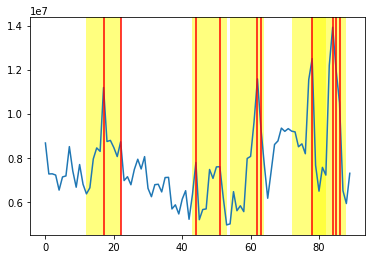

In [ ]:

plt.plot(validation_set.values)
for s, e in list(anomaly_ranges):
  # plt.axvline(x=s, color="red")
  # plt.axvline(x=e, color="red")
  plt.axvspan(s, e, facecolor='yellow', alpha=0.5)
for i in list(predicted_anomalies): 
  plt.axvline(x=i, color="red")
plt.show()